Bootstrap (valid draws):   0%|          | 0/100 [00:00<?, ?draw/s]

/Users/raunaqrai/miniforge3/envs/jwst/lib/python3.12/site-packages/PyRSR/broad_line_fit.py:3481: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


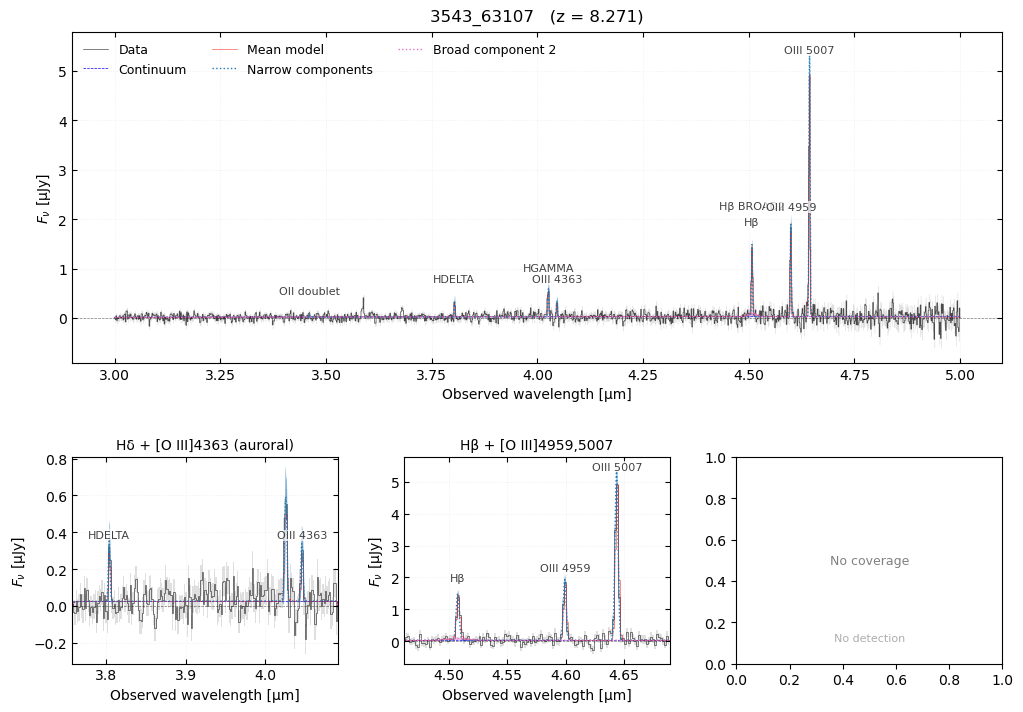


=== MODEL SELECTION (BIC Scores) ===

H-beta:
  Narrow only                      : BIC = 386.99
  Narrow + medium broad            : BIC = 274.82
  Narrow + medium + very broad     : BIC = 291.99
  Narrow + very broad only         : BIC = 272.49
  → Selected: Hβ: narrow + very broad

H-delta:
  Narrow only                      : BIC = 390.61
  → Selected: Hδ: narrow only


=== BOOTSTRAP SUMMARY (value ± error) ===
Line               F_line [erg/s/cm²]          EW₀ [Å]        σ_A [Å]        μ_obs [Å]    SNR_int   SNR_peak(data)    SNR_peak(model)
-----------------------------------------------------------------------------------------------------------------------------
OII_doublet      7.222e-20 ± 4.667e-20     9.51 ± 16.18  22.98 ± 11.91   34591.3 ± 35.2 1.02 ± 0.57      1.37 ± 0.46        0.57 ± 0.81
HDELTA          1.912e-19 ± 3.887e-20    38.44 ± 11.27    9.53 ± 1.58    38040.1 ± 5.9 3.81 ± 0.70      3.12 ± 0.59        3.98 ± 0.94
HGAMMA          3.894e-19 ± 6.734e-20    81.63 ± 2

In [1]:
from astropy.io import fits
import numpy as np
# NOTE: keep the same import path you used before
from PyRSR.broad_line_fit import broad_fit, print_bootstrap_line_table_broad

# ---------- Load + crop ----------
specfile = "../../data/excels-uds04-v4_g395m-f290lp_3543_63107.spec.fits"
with fits.open(specfile) as hdul:
    t = hdul["SPEC1D"].data
    lam = np.asarray(t["wave"])
    fnu = np.asarray(t["flux"])
    enu = np.asarray(t["err"])

target_msaid = "3543_63107"

mask = (lam >= 3.0) & (lam <= 5.0)
spec = dict(lam=lam[mask], flux=fnu[mask], err=enu[mask])

z = 8.271


boot = broad_fit(
    source=spec,    
    z=z,
    grating="G395M",
    source_id=target_msaid,
    n_boot=100,
    lyman_cut=None,
    deg=2,
    plot_continuum_subtracted = False,
    random_state=21,
    continuum_windows=None,
    plot=True,           
    show_progress=True,  
    save_path=None,
    lines_to_use=None,
    broad_mode="auto",
    verbose=False

)

print_bootstrap_line_table_broad(boot)


  [Weighting] Increasing weight for NII_6549 on 3 pixels.
  [Constraints] Tying NII_6549 to NII_6585 (Flux ratio 2.96, tied kinematics).
Fit with lines=['NII_6549', 'H⍺', 'NII_6585']: χ²=826.58, k=6, BIC=856.23
  [Weighting] Increasing weight for NII_6549 on 3 pixels.
  [Constraints] Tying NII_6549 to NII_6585 (Flux ratio 2.96, tied kinematics).
Fit with lines=['NII_6549', 'H⍺', 'NII_6585', 'H⍺_BROAD']: χ²=159.23, k=9, BIC=203.71
  [Weighting] Increasing weight for NII_6549 on 3 pixels.
  [Constraints] Tying NII_6549 to NII_6585 (Flux ratio 2.96, tied kinematics).
Fit with lines=['NII_6549', 'H⍺', 'NII_6585', 'H⍺_BROAD', 'H⍺_BROAD2']: χ²=217.51, k=12, BIC=276.81
  [Weighting] Increasing weight for NII_6549 on 3 pixels.
  [Constraints] Tying NII_6549 to NII_6585 (Flux ratio 2.96, tied kinematics).
Fit with lines=['NII_6549', 'H⍺', 'NII_6585', 'H⍺_BROAD2']: χ²=350.69, k=9, BIC=395.16
Local Hα+[N II] BIC (Hα window only):
  narrow-only      : BIC = 856.23
  +BROAD only      : BIC = 203.71

Bootstrap (valid draws):   0%|          | 0/200 [00:00<?, ?draw/s]


FLUX DIAGNOSTIC: Hα Region

Component fluxes in Hα region (4.5472 - 4.7855 µm):
  NII_6549       : 7.313e-19 erg/s/cm²
  H⍺             : 2.967e-17 erg/s/cm²
  NII_6585       : 2.165e-18 erg/s/cm²
  H⍺_BROAD       : 1.679e-17 erg/s/cm²

Total (sum of components)     : 4.936e-17 erg/s/cm²
Total (integrated model)      : 4.960e-17 erg/s/cm²
Ratio (components/model)      : 0.9953
Discrepancy                   : -0.47%



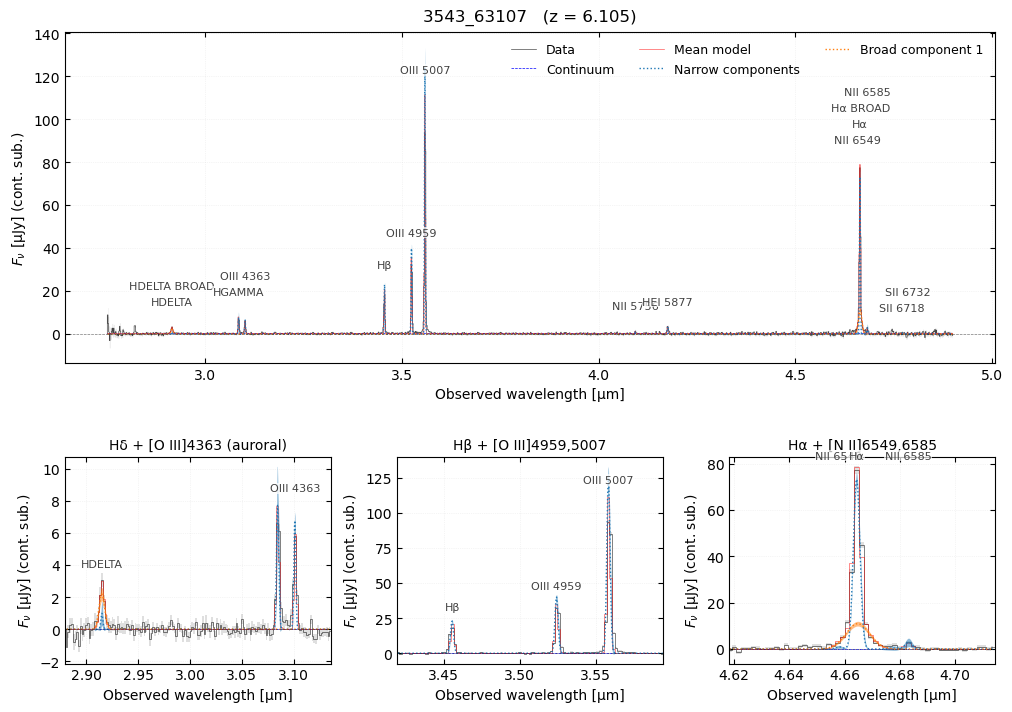


=== MODEL SELECTION (BIC Scores) ===

H-alpha:
  Narrow only                      : BIC = 856.23
  Narrow + medium broad            : BIC = 203.71
  Narrow + medium + very broad     : BIC = 276.81
  Narrow + very broad only         : BIC = 395.16
  → Selected: Hα: narrow + medium broad

H-beta:
  Narrow only                      : BIC = 529.89
  Narrow + medium broad            : BIC = 3488.34
  Narrow + medium + very broad     : BIC = 1081.23
  Narrow + very broad only         : BIC = 3560.47
  → Selected: Hβ: narrow only

H-delta:
  Narrow only                      : BIC = 678.73
  Narrow + medium broad            : BIC = 638.40
  Narrow + very broad only         : BIC = 670.70
  → Selected: Hδ: narrow + medium broad


=== BOOTSTRAP SUMMARY (value ± error) ===
Line               F_line [erg/s/cm²]          EW₀ [Å]        σ_A [Å]        μ_obs [Å]    SNR_int   SNR_peak(data)    SNR_peak(model)
--------------------------------------------------------------------------------------------

In [2]:
from astropy.io import fits
import numpy as np
from PyRSR.broad_line_fit import broad_fit, print_bootstrap_line_table_broad



# ---------- Load + crop ----------
specfile = "../../data/stark-rxcj2248-v4_g395m-f290lp_2478_3.spec.fits"
with fits.open(specfile) as hdul:
    t = hdul["SPEC1D"].data
    lam = np.asarray(t["wave"])
    fnu = np.asarray(t["flux"])
    enu = np.asarray(t["err"])

target_msaid = "3543_63107"

mask = (lam >= 2.75) & (lam <= 5)
spec = dict(lam=lam[mask], flux=fnu[mask], err=enu[mask])

z = 6.1052


boot = broad_fit(
    source=spec,    
    z=z,
    grating="G395M",
    source_id=target_msaid,
    n_boot=200,
    lyman_cut=None,
    deg=2,
    random_state=21,
    continuum_windows=None,
    plot=True,           
    show_progress=True,   
    save_path=None,
    lines_to_use=None,
    plot_continuum_subtracted = True,
    broad_mode="auto",
    verbose=True,
    plot_unit='fnu',
)

print_bootstrap_line_table_broad(boot)